<a href="https://colab.research.google.com/github/TatianaPereyra/ChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Alura Store**

## Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Ayuda a mejorar el grafico de calor

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250
2357,Cuerda para saltar,Deportes y diversión,11200.0,1300.0,17/11/2021,Felipe Santos,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


##1. Análisis de facturación



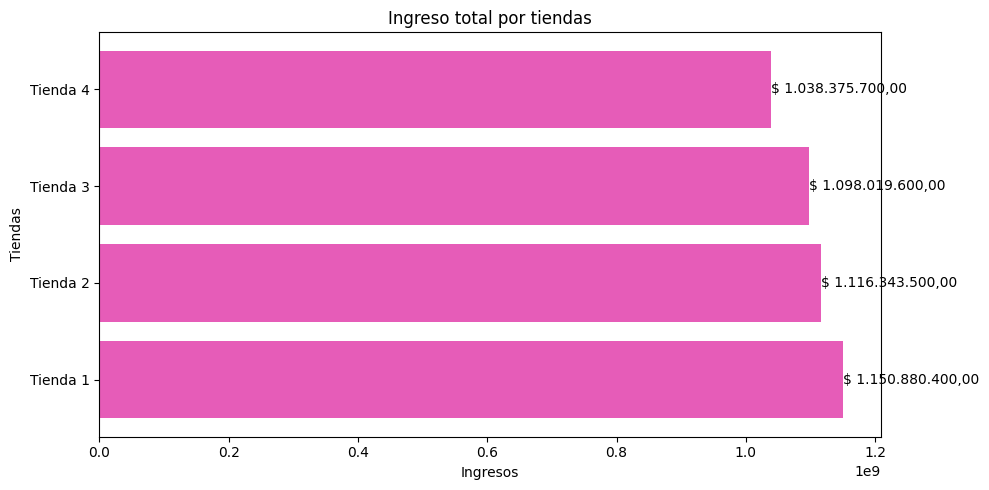

In [ ]:
# Primero almacenamos los datos en un dataframe
dfTienda = pd.DataFrame(tienda)
dfTienda2 = pd.DataFrame(tienda2)
dfTienda3 = pd.DataFrame(tienda3)
dfTienda4 = pd.DataFrame(tienda4)

# Sumamos los ingresos de cada tienda
ingresoTotalTienda1 = dfTienda['Precio'].sum()
ingresoTotalTienda2 = dfTienda2['Precio'].sum()
ingresoTotalTienda3 = dfTienda3['Precio'].sum()
ingresoTotalTienda4 = dfTienda4['Precio'].sum()

#Se almaceba en una variable(lista) ya que es un unico dato
ingresos = [ingresoTotalTienda1, ingresoTotalTienda2, ingresoTotalTienda3, ingresoTotalTienda4]
textosIngresos = [
    f"$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    for v in ingresos
] #formateo el tipo
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

#Grafico
def graficarBarras( x, y, textos, titulo, xlabel, ylabel, isHorizontal):
    color = "#e65cb8"

    fig, ax = plt.subplots(figsize=(10, 5))

    if isHorizontal:                          #compruebo que tipo de grafico de barras quiero (si acostado o no)
        barras = ax.barh(x, y, color=color)
    else:
        barras = ax.bar(x, y, color=color)

    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    for barra, texto in zip(barras, textos):
        if isHorizontal:
            ancho = barra.get_width()
            ax.text(
                ancho,
                barra.get_y() + barra.get_height() / 2,
                texto,
                va="center",
                ha="left"
            )
        else:
            altura = barra.get_height()
            ax.text(
                barra.get_x() + barra.get_width() / 2,
                altura,
                texto,
                ha="center",
                va="bottom"
            )

    plt.tight_layout()
    plt.show()

graficarBarras(tiendas,ingresos,textosIngresos,"Ingreso total por tiendas","Ingresos","Tiendas",True)


## 2. Ventas por categoría

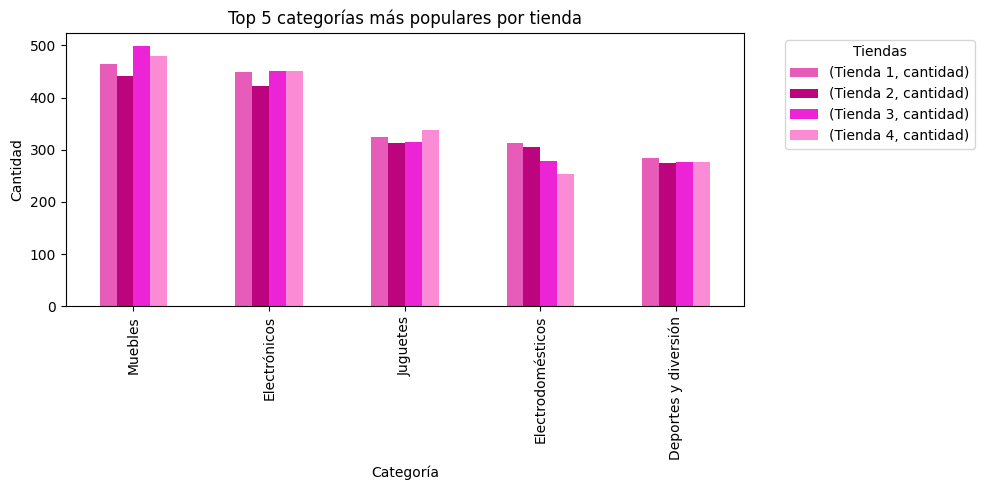

In [ ]:
#Se emplea una funcion para no repetir lineas. La funcion es utilizable tanto para este ejercicio como para el ejercicio 4
def agrupar_series(frame, unir, indice, asc):
  return frame.groupby(unir).size().reset_index(name=indice).sort_values(indice, ascending=asc)


dfCategorias1 = agrupar_series(dfTienda, "Categoría del Producto", "cantidad", False)
dfCategorias2 = agrupar_series(dfTienda2, "Categoría del Producto", "cantidad", False)
dfCategorias3 = agrupar_series(dfTienda3, "Categoría del Producto", "cantidad", False)
dfCategorias4 = agrupar_series(dfTienda4, "Categoría del Producto", "cantidad", False)

#Establezco la categoria como indice
dfCategorias1 = dfCategorias1.set_index("Categoría del Producto")
dfCategorias2 = dfCategorias2.set_index("Categoría del Producto")
dfCategorias3 = dfCategorias3.set_index("Categoría del Producto")
dfCategorias4 = dfCategorias4.set_index("Categoría del Producto")

#Uno todas las categorias
dfAllCategorias = (
    pd.concat(
        [dfCategorias1, dfCategorias2, dfCategorias3, dfCategorias4],
        axis = 1,
        keys=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
    ).fillna(0)
)

top_categorias = (
    dfAllCategorias
        .sum(axis=1)
        .sort_values(ascending=False)
        .head(5)
        .index
)

dfTopCategorias = dfAllCategorias.loc[top_categorias] #Me quedo con las mas populares

#Graficamos de forma horizontal, mostrando cada tienda y la cantidad por categoria segun la tienda
colores = ["#e65cb8", "#bd047f", "#ed24d6", "#fc8bd5"]

fig, ax = plt.subplots(figsize=(10, 5))

dfTopCategorias.plot(
    kind="bar",
    color=colores,
    ax=ax
)

ax.set_title("Top 5 categorías más populares por tienda")
ax.set_ylabel("Cantidad")
ax.set_xlabel("Categoría")

ax.legend(
    title="Tiendas",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()




## 3. Calificación promedio de la tienda


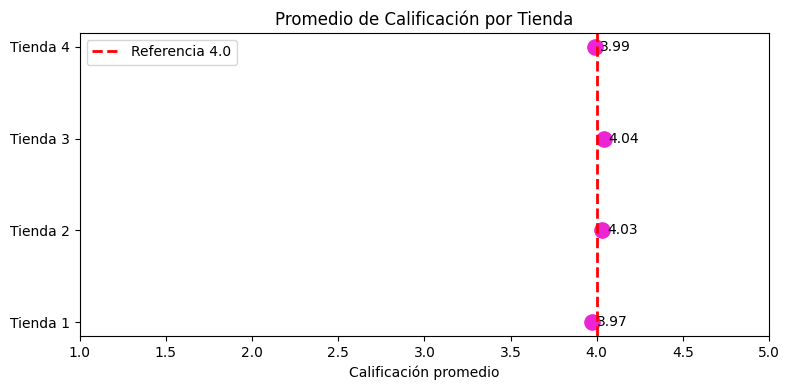

In [ ]:
#Utilizo una funcion para calular el promedio
def promedioCalificacion (tienda):
    promedio = tienda["Calificación"].mean()
    return np.floor(promedio * 100) / 100

promedioCalificacionTienda1 = promedioCalificacion(dfTienda)
promedioCalificacionTienda2 = promedioCalificacion(dfTienda2)
promedioCalificacionTienda3 = promedioCalificacion(dfTienda3)
promedioCalificacionTienda4 = promedioCalificacion(dfTienda4)

#Los almaceno en una lista comun, ya que solo es un numero (un dato solo)
promedios = [promedioCalificacionTienda1, promedioCalificacionTienda2, promedioCalificacionTienda3, promedioCalificacionTienda4]

#grafico
fig, ax = plt.subplots(figsize=(8, 4))

# Puntos
ax.scatter(promedios, tiendas, s=120, color="#ed24d6")

# Línea vertical en 4.0
ax.axvline(
    x=4.0,
    linestyle="--",
    linewidth=2,
    label="Referencia 4.0",
    color="red"
)

ax.set_title("Promedio de Calificación por Tienda")
ax.set_xlabel("Calificación promedio")
ax.set_xlim(1, 5)

# Mostrar valores
for x, y in zip(promedios, tiendas): #junta cada valor con su tienda
    ax.text(x + 0.03, y, f"{x:.2f}", va="center")

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()

## 4. Productos más y menos vendidos

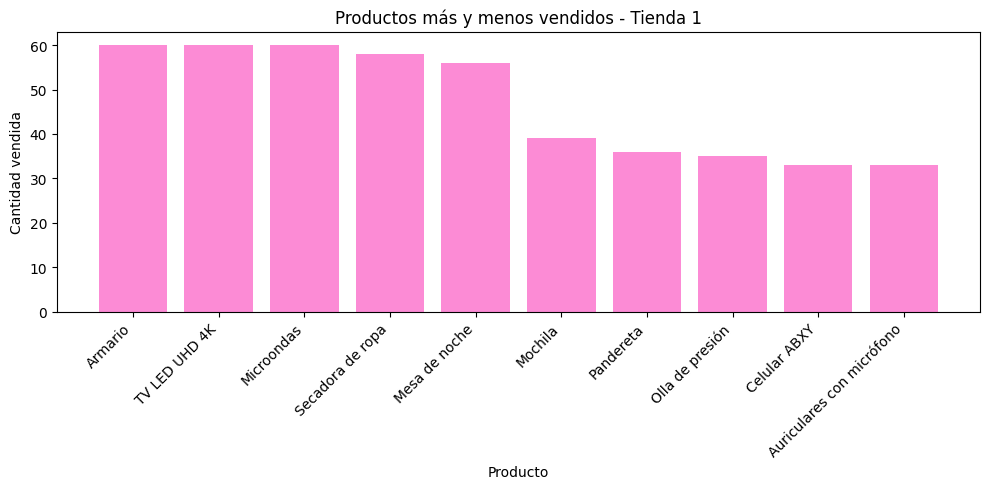

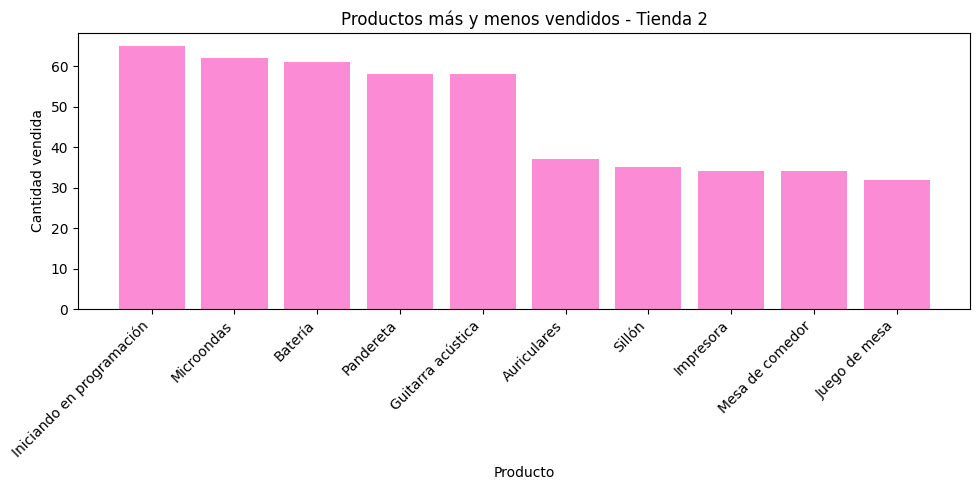

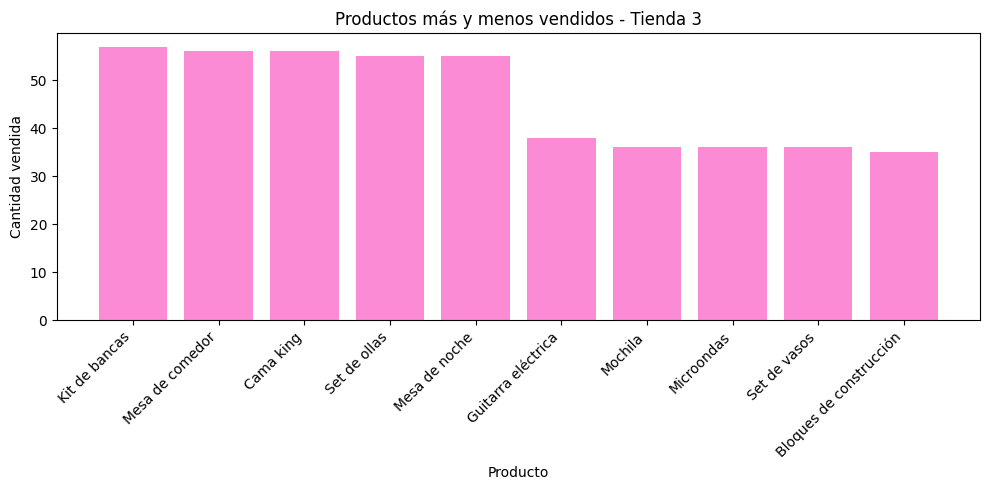

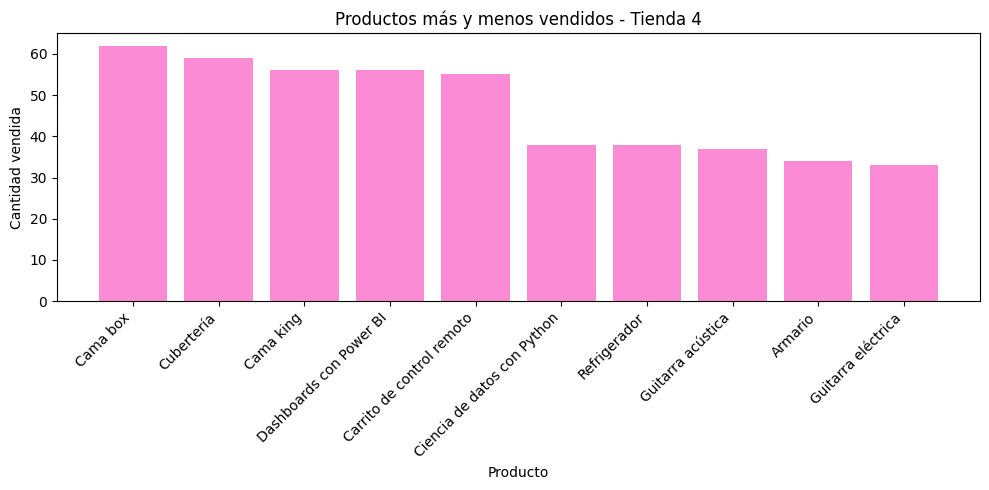

In [ ]:
#Busco el top 5 de productos mas vendidos y los menos y los concateno
def productos_mas_menos(productos):
  masVendidos = productos.head()
  menosVendidos = productos.tail()

  return pd.concat([masVendidos, menosVendidos])

#Se llama a la funcion de agrupacion del punto 2
dfCantProductosTienda1 = productos_mas_menos(agrupar_series(dfTienda, "Producto", "cantidad", False))
dfCantProductosTienda2 = productos_mas_menos(agrupar_series(dfTienda2, "Producto", "cantidad", False))
dfCantProductosTienda3 = productos_mas_menos(agrupar_series(dfTienda3, "Producto", "cantidad", False))
dfCantProductosTienda4 = productos_mas_menos(agrupar_series(dfTienda4, "Producto", "cantidad", False))

#Grafico por tienda los productos
def graficarProductos(tienda, nombre):
  fig, ax = plt.subplots(figsize=(10, 5))

  ax.bar(
          tienda["Producto"], #Necesito acceder a las columnas especificas
          tienda["cantidad"],
          color="#fc8bd5"
      )
  ax.set_title(f"Productos más y menos vendidos - {nombre}")
  ax.set_ylabel("Cantidad vendida")
  ax.set_xlabel("Producto")

  plt.xticks(rotation=45, ha="right") #Para que sean legibles los nombres de los productos
  plt.tight_layout()
  plt.show()

graficarProductos(dfCantProductosTienda1, "Tienda 1")
graficarProductos(dfCantProductosTienda2, "Tienda 2")
graficarProductos(dfCantProductosTienda3, "Tienda 3")
graficarProductos(dfCantProductosTienda4, "Tienda 4")

#Ahora comparamos los productos en comun de las tiendas
#Primero establecemos el producto como indice
dfCantProductosTienda1 = dfCantProductosTienda1.set_index("Producto")
dfCantProductosTienda2 = dfCantProductosTienda2.set_index("Producto")
dfCantProductosTienda3 = dfCantProductosTienda3.set_index("Producto")
dfCantProductosTienda4 = dfCantProductosTienda4.set_index("Producto")




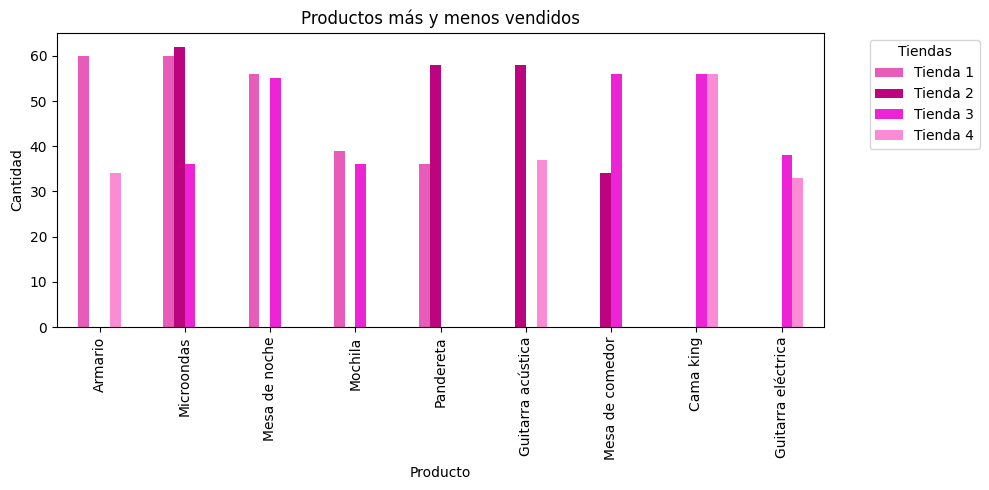

In [ ]:
#Renombramos la columna para que se distinga
dfCantProductosTienda1.columns = ["Tienda 1"]
dfCantProductosTienda2.columns = ["Tienda 2"]
dfCantProductosTienda3.columns = ["Tienda 3"]
dfCantProductosTienda4.columns = ["Tienda 4"]

#Unimos las tiendas por el nuevo indice
dfComparacion = pd.concat(
    [
        dfCantProductosTienda1,
        dfCantProductosTienda2,
        dfCantProductosTienda3,
        dfCantProductosTienda4
    ],
    axis=1
).dropna(thresh=2) #Me quedo con aquellos productos que se repitan en al menos 2 tiendas


#Graficamos esta comparacion
colores = ["#e65cb8", "#bd047f", "#ed24d6", "#fc8bd5"]

fig, ax = plt.subplots(figsize=(10, 5))

dfComparacion.plot(
    kind="bar",
    color=colores,
    ax=ax
)

ax.set_title("Productos más y menos vendidos")
ax.set_ylabel("Cantidad")
ax.set_xlabel("Producto")

ax.legend(
    title="Tiendas",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()



## 5. Envío promedio por tienda

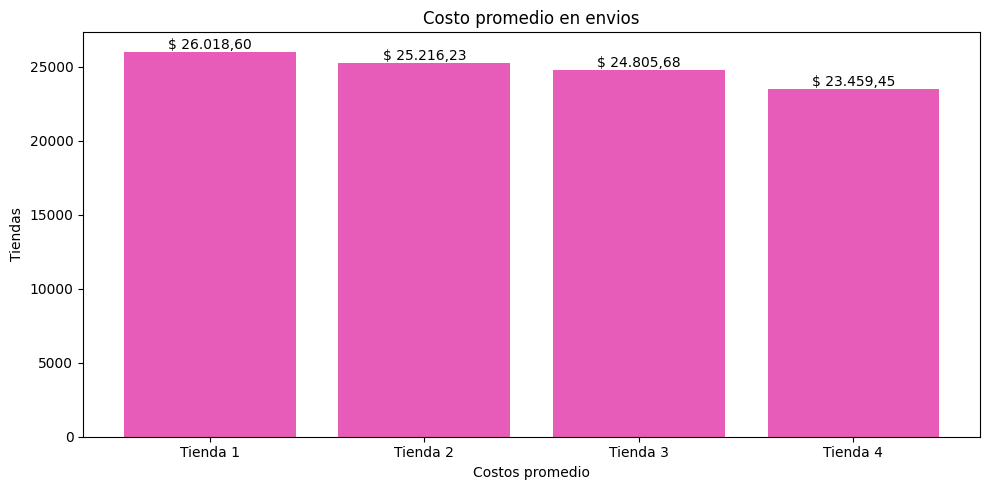

In [ ]:
#Creo el promedio de envio de cada tienda en una funcion
def promedioCostoEnvio(tienda):
    promedio = tienda["Costo de envío"].mean()
    promedio = np.floor(promedio * 100) / 100

    formato = f"$ {promedio:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") #formateo el float a dinero

    return promedio, formato

costoPromedioTienda1,costoEnvio1  = promedioCostoEnvio(dfTienda)
costoPromedioTienda2, costoEnvio2 = promedioCostoEnvio(dfTienda2)
costoPromedioTienda3, costoEnvio3 = promedioCostoEnvio(dfTienda3)
costoPromedioTienda4, costoEnvio4 = promedioCostoEnvio(dfTienda4)

costosPromedios = [costoPromedioTienda1, costoPromedioTienda2, costoPromedioTienda3, costoPromedioTienda4]
costosEnvios = [costoEnvio1, costoEnvio2, costoEnvio3, costoEnvio4]

#graficamos
graficarBarras(tiendas,costosPromedios,costosEnvios,"Costo promedio en envios","Costos promedio","Tiendas",False)

## Extra: Análisis del desempeño geográfico

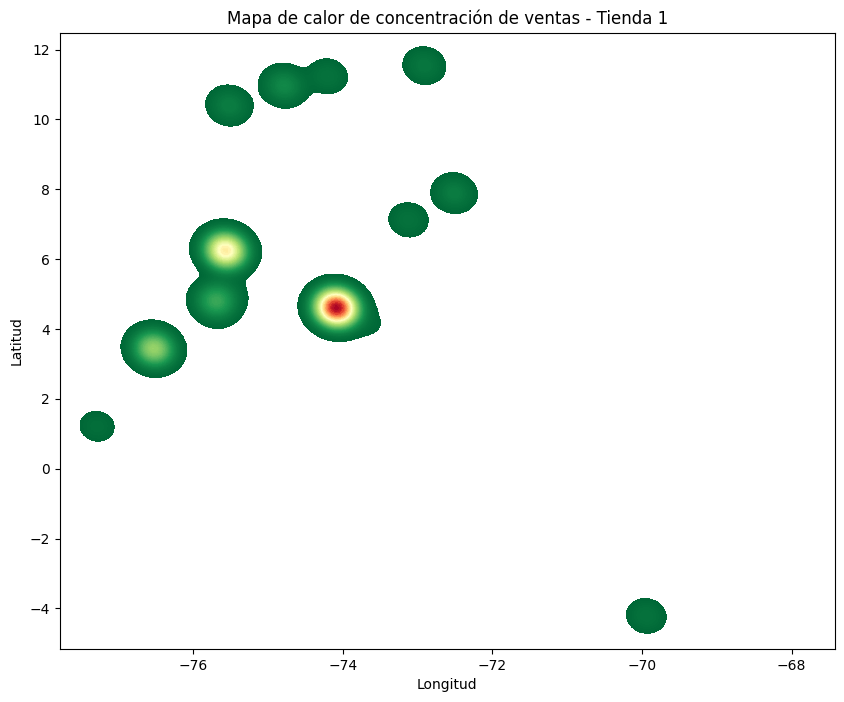

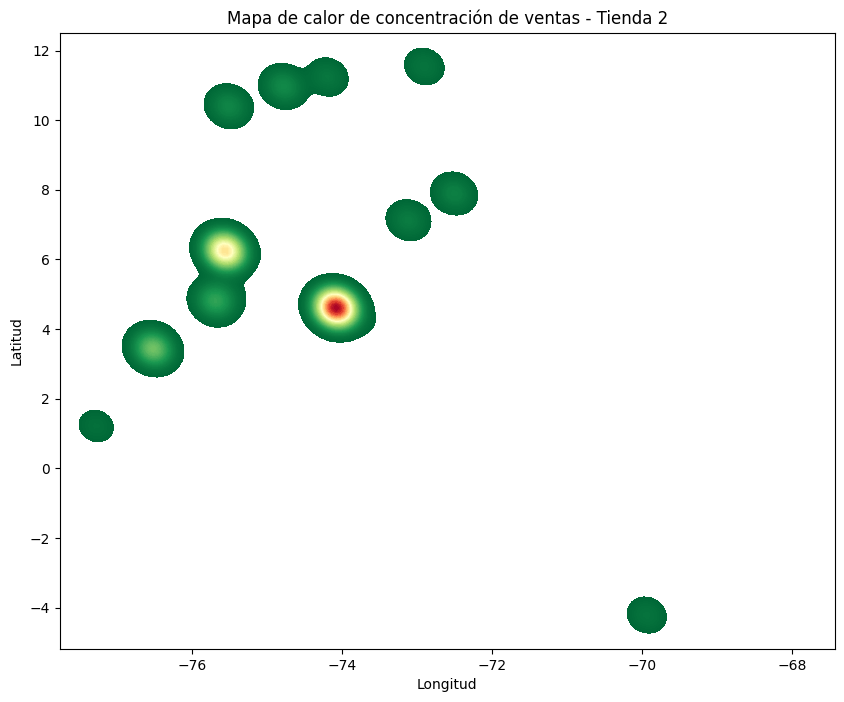

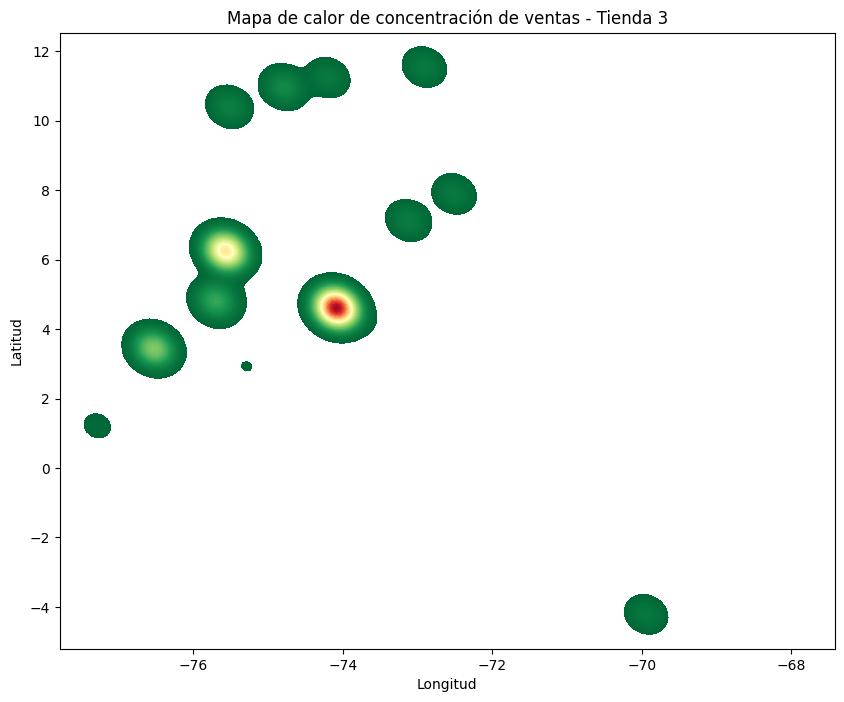

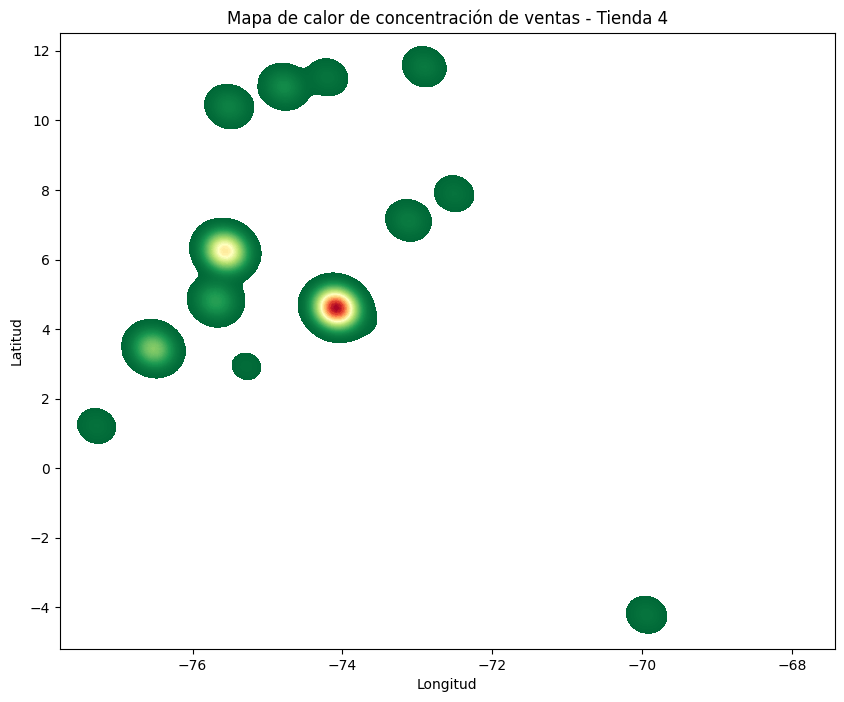

In [ ]:
#Armo una funcion para graficar los mapas de calor
def graficoCalorZonasVentas(tienda, nombre):
    plt.figure(figsize=(10, 8))

    sns.kdeplot(
        x=tienda["lon"],
        y=tienda["lat"],
        fill=True,         #rellenar zonas de densidad
        cmap="RdYlGn_r",
        bw_adjust=0.5,     # controla el radio de calor
        levels=100,
        thresh=0.05
    )

    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.title(f"Mapa de calor de concentración de ventas - {nombre}")

    plt.show()

graficoCalorZonasVentas(dfTienda, "Tienda 1")
graficoCalorZonasVentas(dfTienda2, "Tienda 2")
graficoCalorZonasVentas(dfTienda3, "Tienda 3")
graficoCalorZonasVentas(dfTienda4, "Tienda 4")
